In [1]:
import csv
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [2]:
df_train= pd.read_csv('SelectedFeatureFinal_train.csv')
df_test = pd.read_csv('SelectedFeatureFinal_test.csv')

In [3]:
df_test =df_test.drop('Unnamed: 0',axis=1)
df_train=df_train.drop('Unnamed: 0',axis=1)

In [4]:
X_train = df_train.drop('result',axis=1)
y_train = df_train['result']
X_test = df_test.drop('result',axis=1)
y_test = df_test['result']

Accuracy Score: 0.763


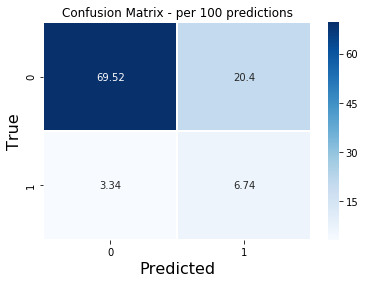

In [7]:
sgdc=SGDClassifier(alpha=0.5,max_iter=50,
       n_jobs=4, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
sgdc.fit(X_train,y_train)
predict_test = sgdc.predict(X_test)
def results(predict_test, y_test):
    print ("Accuracy Score: %.3f" % accuracy_score(y_test, predict_test))
    
    cm = confusion_matrix(y_test, predict_test)
    df_cm = pd.DataFrame(100*cm/float(cm.sum()))
    ax = sns.heatmap(df_cm.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
    ax.set_title("Confusion Matrix - per 100 predictions")
    ax.set_xlabel('Predicted', fontsize=16)
    ax.set_ylabel('True', fontsize=16, rotation=90)
    plt.show()

results(sgdc.predict(X_test), y_test)

In [8]:
print(classification_report(y_test,predict_test))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85      3469
          1       0.25      0.67      0.36       389

avg / total       0.88      0.76      0.80      3858



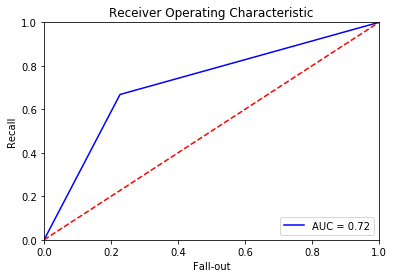

In [9]:
false_positive_rate, recall, thresholds = roc_curve(y_test, predict_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [10]:
filename = 'SGD_Classifier.pkl'
pickle.dump(sgdc, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7625712804561949


In [13]:
def classifaction_report_csv(report):
            report_data = []
            lines = report.split('\n')
            for line in lines[2:-3]:
                row = {}
                row_data = line.split('      ')
                row['class'] = row_data[0]
                row['precision'] = float(row_data[1])
                row['recall'] = float(row_data[2])
                row['f1_score'] = float(row_data[3])
                row['support'] = float(row_data[4])
                report_data.append(row)
            df = pd.DataFrame.from_dict(report_data)
            df.to_csv("Classification_report_SGDC.csv", index = False)

report = classification_report(y_test, predict_test)
classifaction_report_csv(report)